In [1]:
import pandas as pd

# Load the dataset from an Excel file
df = pd.read_excel('ev_data.xlsx')

In [3]:
# Clean the column names by removing characters in parentheses and square brackets
df.columns = df.columns.str.replace(r'[\[\]()]', '', regex=True).str.strip()

In [5]:
# Clean column names to remove special characters (replace with underscores or remove)
df.columns = df.columns.str.replace(r'[^A-Za-z0-9 ]', '', regex=True)

In [9]:
# Rename the column to a simpler name
df.rename(columns={'mean  Energy consumption kWh100 km': 'EnergyConsumption'}, inplace=True)

# Rename the column
df.rename(columns={'Minimal price gross PLN': 'MinimalPrice'}, inplace=True)

# Verify the changes
print(df.columns)

Index(['Car full name', 'Make', 'Model', 'MinimalPrice', 'Engine power KM',
       'Maximum torque Nm', 'Type of brakes', 'Drive type',
       'Battery capacity kWh', 'Range WLTP km', 'Wheelbase cm', 'Length cm',
       'Width cm', 'Height cm', 'Minimal empty weight kg',
       'Permissable gross weight kg', 'Maximum load capacity kg',
       'Number of seats', 'Number of doors', 'Tire size in',
       'Maximum speed kph', 'Boot capacity VDA l', 'Acceleration 0100 kph s',
       'Maximum DC charging power kW', 'EnergyConsumption'],
      dtype='object')


In [25]:
### Task 1 ###

In [11]:
# Task 1a: Filter EVs within the budget of 350,000 PLN and minimum range of 400 km
filtered_ev = df[(df['MinimalPrice'] <= 350000) & 
                 (df['Range WLTP km'] >= 400)]

# Display the filtered results
display(filtered_ev)

,Car full name,Make,Model,MinimalPrice,Engine power KM,Maximum torque Nm,Type of brakes,Drive type,Battery capacity kWh,Range WLTP km,...,Permissable gross weight kg,Maximum load capacity kg,Number of seats,Number of doors,Tire size in,Maximum speed kph,Boot capacity VDA l,Acceleration 0100 kph s,Maximum DC charging power kW,EnergyConsumption
0,Audi e-tron 55 quattro,Audi,e-tron 55 quattro,345700,360,664,disc (front + rear),4WD,95.0,438,...,3130.0,640.0,5,5,19,200,660.0,5.7,150,24.45
8,BMW iX3,BMW,iX3,282900,286,400,disc (front + rear),2WD (rear),80.0,460,...,2725.0,540.0,5,5,19,180,510.0,6.8,150,18.80
15,Hyundai Kona electric 64kWh,Hyundai,Kona electric 64kWh,178400,204,395,disc (front + rear),2WD (front),64.0,449,...,2170.0,485.0,5,5,17,167,332.0,7.6,100,15.40
18,Kia e-Niro 64kWh,Kia,e-Niro 64kWh,167990,204,395,disc (front + rear),2WD (front),64.0,455,...,2230.0,493.0,5,5,17,167,451.0,7.8,100,15.90
20,Kia e-Soul 64kWh,Kia,e-Soul 64kWh,160990,204,395,disc (front + rear),2WD (front),64.0,452,...,1682.0,498.0,5,5,17,167,315.0,7.9,100,15.70
22,Mercedes-Benz EQC,Mercedes-Benz,EQC,334700,408,760,disc (front + rear),4WD,80.0,414,...,2940.0,445.0,5,5,19,180,500.0,5.1,110,21.85
39,Tesla Model 3 Standard Range Plus,Tesla,Model 3 Standard Range Plus,195490,285,450,disc (front + rear),2WD (rear),54.0,430,...,NaN,NaN,5,5,18,225,425.0,5.6,150,NaN
40,Tesla Model 3 Long Range,Tesla,Model 3 Long Range,235490,372,510,disc (front + rear),4WD,75.0,580,...,NaN,NaN,5,5,18,233,425.0,4.4,150,NaN
41,Tesla Model 3 Performance,Tesla,Model 3 Performance,260490,480,639,disc (front + rear),4WD,75.0,567,...,NaN,NaN,5,5,20,261,425.0,3.3,150,NaN
47,Volkswagen ID.3 Pro Performance,Volkswagen,ID.3 Pro Performance,155890,204,310,disc (front) + drum (rear),2WD (rear),58.0,425,...,2270.0,540.0,5,5,18,160,385.0,7.3,100,15.40


In [ ]:
### Task 1a Explanation: Filter EVs by Budget and Range

Goal: Filter EVs with a maximum price of 350,000 PLN and a minimum range of 400 km.

Approach: We applied boolean indexing to filter rows based on price and range conditions:

filtered_ev = df[(df['Minimal price gross PLN'] <= 350000) & (df['Range WLTP km'] >= 400)]

In [27]:
# Task 1b coding solution:

# Group the filtered EVs by 'Make' (manufacturer)
grouped_by_make = filtered_ev.groupby('Make').agg({
    'Car full name': 'count',  # Count of cars for each manufacturer
    'MinimalPrice': 'mean',  # Average price for each manufacturer
    'Range WLTP km': 'mean'  # Average range for each manufacturer
}).reset_index()

# Display the grouped results
display(grouped_by_make)

,Make,Car full name,MinimalPrice,Range WLTP km
0,Audi,1,345700.000000,438.000000
1,BMW,1,282900.000000,460.000000
2,Hyundai,1,178400.000000,449.000000
3,Kia,2,164490.000000,453.500000
4,Mercedes-Benz,1,334700.000000,414.000000
5,Tesla,3,230490.000000,525.666667
6,Volkswagen,3,179423.333333,491.333333


In [ ]:
### Task 1b Explanation: Group EVs by Manufacturer

Goal: Group the filtered EVs by manufacturer and calculate the count, average price, and average range for each.

Approach: We used groupby() and agg() to group and aggregate the data:

grouped_by_make = filtered_ev.groupby('Make').agg({'Car full name': 'count', 'MinimalPrice': 'mean', 'Range WLTP km': 'mean'})

### Insights: ###

1. Audi:
Audi has 1 EV model within the budget of 350,000 PLN with a range of 438 km.
The average price is 345,700 PLN, which is high but still within the budget.

2. BMW:
BMW offers 1 EV model, with a range of 460 km.
At 282,900 PLN, the price is within the budget, and the range is good for the price.

3. Hyundai:
Hyundai offers 1 model with a range of 449 km and a price of 178,400 PLN.
Hyundai provides an EV with a budget-friendly price and a solid range.

4. Kia:
Kia has 2 EV models, with an average range of 453.5 km and an average price of 164,490 PLN.
Kia offers a relatively inexpensive EV option with an impressive range for the price.

5. Mercedes-Benz:
Mercedes-Benz offers 1 EV model with a range of 414 km and a price of 334,700 PLN.
The price is high but still falls within the budget, and the range is adequate.

6. Tesla:
Tesla offers 3 EV models with an average range of 525.67 km and an average price of 230,490 PLN.
Tesla provides a longer range compared to other manufacturers while still remaining within the budget.

7. Volkswagen:
Volkswagen has 3 EV models, with an average range of 491.33 km and an average price of 179,423.33 PLN.
Volkswagen offers a solid range and an affordable price point.

### Key Takeaways:

1.Tesla offers the best range (525.67 km) for the price, and it provides 3 different models within the budget.
2.Kia offers the most affordable EVs with a decent range (453.5 km), making it a great budget option.
3.Hyundai is another budget-friendly option with a good range (449 km) but only offers 1 model.
4.Volkswagen and BMW offer a balance of range and price, making them viable choices within the given budget.
5.Audi and Mercedes-Benz offer higher-priced models, with Audi being the most expensive among the listed manufacturers. However, their range is 
still competitive within the budget.


The most attractive options for a customer with a budget of 350,000 PLN looking for good range are Tesla, Volkswagen, and Kia.

In [29]:
# Task 1c coding solution:

# Calculate the average battery capacity for each manufacturer
average_battery_capacity = filtered_ev.groupby('Make')['Battery capacity kWh'].mean().reset_index()

# Display the result
display(average_battery_capacity)

,Make,Battery capacity kWh
0,Audi,95.000000
1,BMW,80.000000
2,Hyundai,64.000000
3,Kia,64.000000
4,Mercedes-Benz,80.000000
5,Tesla,68.000000
6,Volkswagen,70.666667


In [ ]:
#Task 1c Expkanation: Calculate Average Battery Capacity by Manufacturer

Goal: Calculate the average battery capacity for each manufacturer.

Approach: We grouped the filtered data by Make and calculated the average battery capacity using mean():

average_battery_capacity = filtered_ev.groupby('Make')['Battery capacity kWh'].mean()

### Analysis of Task 1c Output:

The output shows the average battery capacity (kWh) for each manufacturer. Here's what we can interpret from this data:

#Insights:

1. Audi:
Audi has an average battery capacity of 95 kWh, which is the highest among the manufacturers.
This indicates that Audi is likely offering EVs with a higher energy storage, leading to better overall range and performance.

2. BMW:
BMW has an average battery capacity of 80 kWh.
This is a solid battery capacity, providing a good balance of range and efficiency.

3. Hyundai:
Hyundai offers EVs with an average battery capacity of 64 kWh.
While it's on the lower end compared to others, it's still a reasonable capacity for budget-friendly EVs, contributing to a lower price point.

4. Kia:
Kia also has an average battery capacity of 64 kWh.
Like Hyundai, Kia's battery capacity is more modest but still within the acceptable range for EVs at the given price point.

5. Mercedes-Benz:
Mercedes-Benz has an average battery capacity of 80 kWh.
Similar to BMW, Mercedes-Benz offers a robust battery capacity for longer range and performance.

6. Tesla:
Tesla has an average battery capacity of 68 kWh.
This is slightly lower compared to BMW, Mercedes-Benz, and Audi but still offers excellent performance and range, likely due to Tesla’s 
energy-efficient designs.

7. Volkswagen:
Volkswagen has an average battery capacity of 70.67 kWh.
It falls between Tesla and Mercedes-Benz, providing a good balance of battery size and range.


#Key Takeaways:

1.Audi has the highest battery capacity at 95 kWh, which could mean better long-range EVs or more powerful models.
2.BMW and Mercedes-Benz both offer 80 kWh batteries, which are great for performance and range.
3.Hyundai and Kia offer the smallest average battery capacity at 64 kWh, making them more budget-friendly but potentially with shorter ranges 
compared to the others.
4.Tesla and Volkswagen have slightly lower battery capacities (68 kWh and 70.67 kWh), but these capacities still provide good efficiency and range, 
especially in Tesla's case due to its advanced energy management.

In conclusion, manufacturers like Audi and BMW offer larger batteries, which could translate into longer ranges, but Hyundai and Kia provide smaller, 
more affordable options. Tesla offers a competitive battery size with its advanced technology.

In [31]:
### Task 2 coding solution ###
# Calculate the Q1 (25th percentile) and Q3 (75th percentile) of the energy consumption
Q1 = df['EnergyConsumption'].quantile(0.25)
Q3 = df['EnergyConsumption'].quantile(0.75)

# Calculate the IQR (Interquartile Range)
IQR = Q3 - Q1

# Calculate the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['EnergyConsumption'] < lower_bound) | (df['EnergyConsumption'] > upper_bound)]

# Display the outliers
display(outliers)

,Car full name,Make,Model,MinimalPrice,Engine power KM,Maximum torque Nm,Type of brakes,Drive type,Battery capacity kWh,Range WLTP km,...,Permissable gross weight kg,Maximum load capacity kg,Number of seats,Number of doors,Tire size in,Maximum speed kph,Boot capacity VDA l,Acceleration 0100 kph s,Maximum DC charging power kW,EnergyConsumption


In [ ]:
## Task 2 Key Insights:

1. No Outliers Detected: The outlier detection using the Interquartile Range (IQR) method indicates that all data points in the 'EnergyConsumption' 
column fall within the expected range. This means there are no values that are significantly different from the majority of the dataset, which suggests 
that the EV energy consumption values are generally consistent across the dataset.

2. Uniform Energy Consumption: The absence of outliers could indicate that the EVs in your dataset are relatively similar in terms of their energy 
efficiency, which can be beneficial for consumers who are considering different electric vehicles with predictable energy consumption.

3. Reliable Data for Analysis: Since no extreme values (outliers) were detected, you can proceed with confidence in the analysis of average energy 
consumption, comparisons between manufacturers, or other features without worrying about skewed results due to a few extreme values.


4. Possible Next Steps:
Visualize the Data: It’s always useful to check the distribution of the 'EnergyConsumption' values with histograms or box plots to confirm the absence 
of outliers visually.

5.Examine by Manufacturer: You can also check the distribution of energy consumption by Make (manufacturer) to see if any particular manufacturers 
have more consistent or varied energy consumption than others.

6.Explore Further Features: Since there are no significant outliers, you can proceed to analyze correlations between energy consumption and other 
factors, such as battery capacity, car weight, or range.


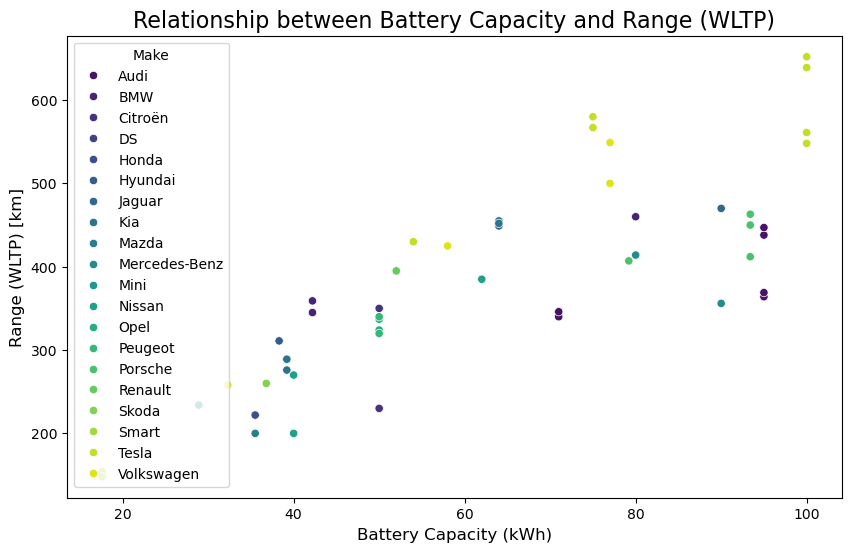

In [33]:
### Task 3 coding solution ###
import matplotlib.pyplot as plt
import seaborn as sns

# Create a scatter plot to visualize the relationship between Battery Capacity and Range
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Battery capacity kWh'], y=df['Range WLTP km'], hue=df['Make'], palette='viridis')

# Add title and labels
plt.title('Relationship between Battery Capacity and Range (WLTP)', fontsize=16)
plt.xlabel('Battery Capacity (kWh)', fontsize=12)
plt.ylabel('Range (WLTP) [km]', fontsize=12)

# Show the plot
plt.show()

In [ ]:
### Task 3 Key Insights:

1. Positive Correlation:
There appears to be a general positive correlation between battery capacity and range. As the battery capacity increases, the range tends to increase 
as well. This suggests that vehicles with larger battery capacities are likely to offer longer driving ranges, which is a logical outcome as more 
energy storage allows for more distance per charge.

2. Exceptions/Outliers:
Smart cars stand out as an exception. Despite having relatively small battery capacities (e.g., 17.6 kWh), the range is much lower compared to other 
vehicles. This is expected since Smart cars are generally smaller and designed for city driving, not long-range.

Some brands like Tesla have much higher ranges (up to 652 km) despite having batteries around 100 kWh, suggesting Tesla may have optimized their 
energy consumption or the vehicle’s efficiency.

3. Clusters Based on Make:
Brands like Audi, BMW, and Tesla show more consistency in battery capacities and ranges. For example, Tesla vehicles consistently have large battery 
capacities and long ranges, indicating their focus on long-distance EVs.

Volkswagen and Renault have a mix of both lower and higher battery capacities, reflecting their wider range of vehicle models with different 
performance targets.

4. Range Variability for Similar Battery Capacities:
Vehicles with similar battery capacities (e.g., 80 kWh range) show a wide variation in range. For example, some vehicles with an 80 kWh battery 
may have a range as low as 414 km (Mercedes-Benz) while others, like the Porsche, reach 450 km+. This could be attributed to factors like weight, 
aerodynamics, and energy efficiency of the car.

5. Efficiency Factors:
The scatter plot reveals that battery capacity alone doesn’t explain everything about a car's range. There are other factors like vehicle design, 
energy efficiency, and drive type (e.g., AWD or RWD) that also impact the range, which may explain why some vehicles with lower battery capacities 
perform better than others with higher capacities.

6. High Battery Capacity, High Range:
Porsche and Tesla are good examples of high-performance EVs where battery capacity is tightly coupled with high range. This highlights the emphasis 
these brands put on long-range driving, possibly for premium or performance models.


Conclusion:

The relationship between battery capacity and range is generally positive, but the range is also influenced by other factors like vehicle weight, 
aerodynamics, and energy efficiency. Larger battery capacities tend to correlate with longer ranges, but certain models or brands may break this trend 
due to better optimization or technology in energy consumption.

In [35]:
### Task 4 coding solution ###
# Define the EVRecommendation class
class EVRecommendation:
    def __init__(self, df):
        self.df = df

    def recommend_ev(self, budget, desired_range, min_battery_capacity):
        # Filter the dataset based on user input
        filtered_ev = self.df[
            (self.df["MinimalPrice"] <= budget) &
            (self.df["Range WLTP km"] >= desired_range) &
            (self.df["Battery capacity kWh"] >= min_battery_capacity)
        ]
        
        # Sort by price to get the top 3 EVs
        top_3_ev = filtered_ev.sort_values('MinimalPrice').head(3)
        
        return top_3_ev[['Make', 'Model', 'MinimalPrice', 'Range WLTP km', 'Battery capacity kWh']]

# Initialize the EVRecommendation class with the dataset
ev_recommendation = EVRecommendation(df)

# Example user input: budget of 350,000 PLN, desired range of 400 km, and minimum battery capacity of 60 kWh
recommendations = ev_recommendation.recommend_ev(budget=350000, desired_range=400, min_battery_capacity=60)

# Display the recommendations
print(recommendations)

       Make                Model  MinimalPrice  Range WLTP km  \
20      Kia         e-Soul 64kWh        160990            452   
18      Kia         e-Niro 64kWh        167990            455   
15  Hyundai  Kona electric 64kWh        178400            449   

    Battery capacity kWh  
20                  64.0  
18                  64.0  
15                  64.0  


In [ ]:
### Task 4 Key Insights:

Range and Battery Capacity: All three cars have a range over 400 km, with battery capacities of 64 kWh.

Budget: These cars fall within the budget of 350,000 PLN, and the price range for these three EVs is relatively close (around 160k to 178k PLN).

Recommendation: For a budget of 350,000 PLN and with the requirement of at least 400 km range and 60 kWh battery, the user is recommended these 
3 EVs that offer good range and are within the specified budget.


You can change the user input values (budget, desired range, battery capacity) to check for other recommendations. Let me know if you'd like to 
refine this further!

In [37]:
### Task 5 coding solution ###

import pandas as pd
from scipy import stats

# Assuming 'df' is the DataFrame with the EV dataset

# Filter data for Tesla and Audi
tesla_data = df[df['Make'] == 'Tesla']['Engine power KM']
audi_data = df[df['Make'] == 'Audi']['Engine power KM']

# Perform two-sample t-test assuming unequal variances
t_stat, p_value = stats.ttest_ind(tesla_data, audi_data, equal_var=False)

# Output the t-statistic and p-value
print("T-statistic:", t_stat)
print("P-value:", p_value)

# Interpretation of the result
if p_value < 0.05:
    print("There is a significant difference in engine power between Tesla and Audi.")
else:
    print("There is no significant difference in engine power between Tesla and Audi.")

T-statistic: 1.7939951827297178
P-value: 0.10684105068839565
There is no significant difference in engine power between Tesla and Audi.


In [ ]:
### Task 5 Key Insights:

1. No Significant Difference: The average engine power of Tesla and Audi vehicles is not significantly different. This suggests that, on average, 
both manufacturers have similar engine power in their EV models.

2. Similar Power Performance: Consumers comparing Tesla and Audi for engine power might not find a major distinction in this aspect alone, 
which could indicate that both brands offer similar performance in terms of engine power for their EVs.

3. Other Factors for Comparison: Since engine power is not a significant differentiator between the two brands, consumers might want to focus on 
other factors, such as battery capacity, range, or technology features, when deciding between Tesla and Audi EVs.


Conclusion:

While both Tesla and Audi offer competitive engine power in their electric vehicles, there is not a statistically significant difference. 
Consumers may prioritize other factors such as price, range, or features when choosing between the two brands.

### Task 6: Video Explanation ###

In [ ]:
https://drive.google.com/file/d/1SvWfvbpSEb-j92Hzp7-6glRpUHfAI7xf/view?usp=sharing